## Configurações

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../data/input/creditcard_clean.csv')

## Pré-processamento para Machine Learning

In [14]:
features = df.columns[:-1]
target = df.columns[-1]

print(f'Features: {features}')
print(f'Target: {target}')

Features: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Target: Class


In [24]:
y = df['Class']
X = df.drop('Class', axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
preprocessor = ColumnTransformer([
    ('num_transformer', StandardScaler(), features)
], remainder='passthrough')

In [27]:
X_train_preproc = preprocessor.fit_transform(X_train)
X_test_preproc = preprocessor.transform(X_test)

In [30]:
X_test_df = pd.DataFrame(X_test_preproc, columns=features)
X_test_df.to_csv("../data/output/X_test.csv")
y_test.to_csv("../data/output/y_test.csv")

In [31]:
X_train_preproc.shape

(226980, 30)

> Isso nos deixa com +226k amostras para treino, cada uma com 30 features

> Como já notado anteriormente, nossos dados estão desbalanceados:

In [32]:
y_train.value_counts()

Class
0    226613
1       367
Name: count, dtype: int64

Vamos lidar com o desbalanceamento utilizando a técnica SMOTE (Synthetic Minority Oversampling Technique).

In [35]:
imb = SMOTE()

In [36]:
X_res, y_res = imb.fit_resample(X_train_preproc, y_train)

In [38]:
X_res_df = pd.DataFrame(X_res, columns=features)
X_res_df.to_csv("../data/output/X_rebalanced.csv")
y_res.to_csv("../data/output/y_rebalanced.csv")

In [39]:
y_res.value_counts()

Class
0    226613
1    226613
Name: count, dtype: int64

Text(0.5, 0, 'Class')

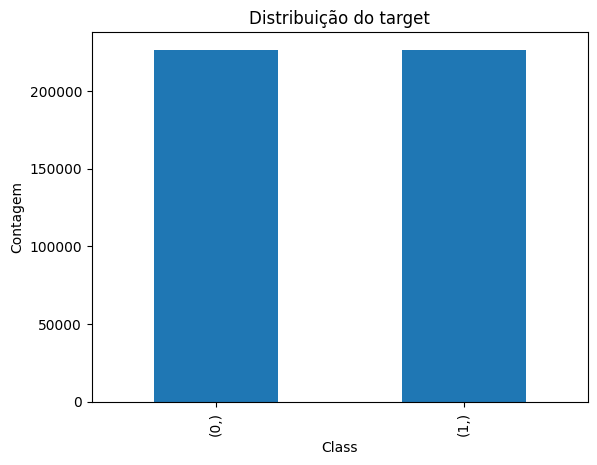

In [42]:
pd.DataFrame(y_res).value_counts().plot(kind='bar')
plt.title("Distribuição do target")
plt.ylabel("Contagem")
plt.xlabel("Class")

## Modelo

In [55]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')

In [56]:
model.fit(X_res, y_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [57]:
y_pred = model.predict(X_test_preproc)

In [ ]:
print('Acurácia:', accuracy_score(y_test, y_pred))

Accuracy: 0.9791174708349487


In [59]:
cm = confusion_matrix(y_test, y_pred)

In [62]:
print(cm)

[[55475  1165]
 [   20    86]]


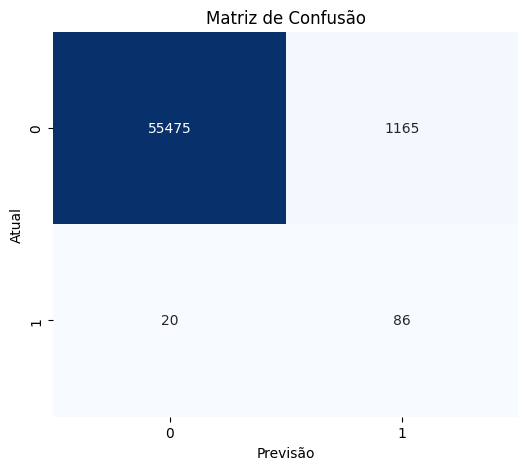

In [63]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Atual')
plt.title('Matriz de Confusão')
plt.show()

In [64]:
print('Métricas:\n', classification_report(y_test, y_pred))

Métricas:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56640
           1       0.07      0.81      0.13       106

    accuracy                           0.98     56746
   macro avg       0.53      0.90      0.56     56746
weighted avg       1.00      0.98      0.99     56746

